# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split 
from sklearn.model_selection import train_test_split

# import function to perform linear regression using OLS
import statsmodels.api as sm

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

# 2. Collect and load data

In [3]:
df=pd.read_csv('bigcity.csv')
df.head(5)

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


# 3. Explore numeric variables - five number summary

In [10]:
print('Null Values :',df.isnull().sum())
print('--'*12)
print('--'*12)
print('Skew :',df.skew())
print('--'*12)
print('--'*12)
print('Correlation :',df.corr())

Null Values : Unnamed: 0    0
u             0
x             0
dtype: int64
------------------------
------------------------
Skew : Unnamed: 0    0.000000
u             2.255276
x             2.492902
dtype: float64
------------------------
------------------------
Correlation :             Unnamed: 0         u         x
Unnamed: 0    1.000000 -0.024788 -0.047890
u            -0.024788  1.000000  0.981742
x            -0.047890  0.981742  1.000000


# 3a. Visualize numeric variables in boxplot and histograms
# 3b. Measure spread – variance and standard deviation

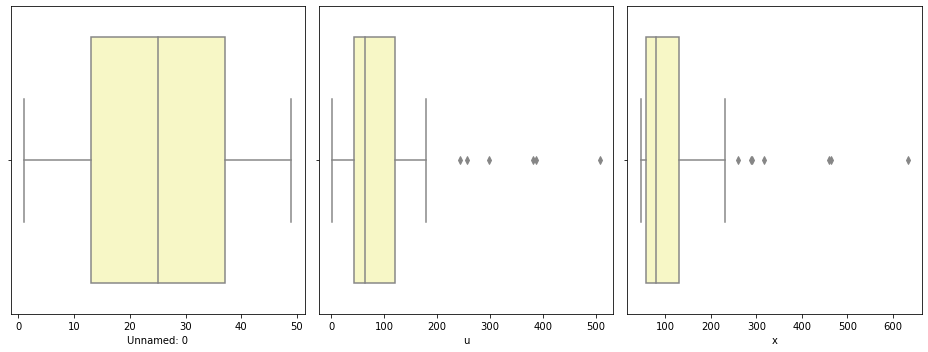

In [21]:
n=1
plt.figure(figsize=(13,5))
for i in df.columns:
    plt.subplot(1,3,n)
    n+=1
    sns.boxplot(df[i],palette='Spectral')
    plt.tight_layout()

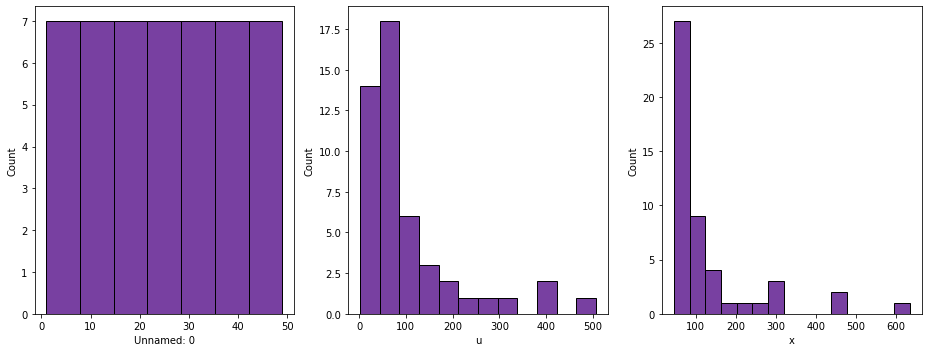

In [32]:
n=1
plt.figure(figsize=(13,5))
for i in df.columns:
    plt.subplot(1,3,n)
    n+=1
    sns.histplot(df[i],color='indigo')
    plt.tight_layout()

In [33]:
print('Variance :',df.var())
print('std :',df.std())

Variance : Unnamed: 0      204.166667
u             10900.416667
x             15158.832483
dtype: float64
std : Unnamed: 0     14.288690
u             104.405061
x             123.121211
dtype: float64


# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

In [34]:
df.head(1)

,Unnamed: 0,u,x
0,1,138,143


<AxesSubplot:xlabel='Unnamed: 0', ylabel='u'>

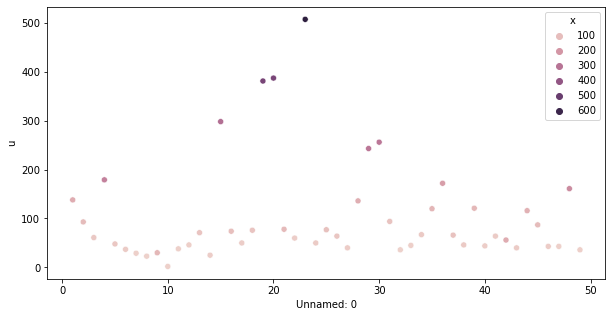

In [41]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Unnamed: 0'],y=df['u'],hue=df['x'])

# 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [43]:
mdf=df.copy()

In [45]:
mdf=mdf.apply(lambda rec: (rec-rec.mean())/rec.std())
mdf.head()

,Unnamed: 0,u,x
0,-1.679650,0.333864,0.123489
1,-1.609665,-0.097149,-0.193272
2,-1.539679,-0.403648,-0.477545
3,-1.469694,0.726566,1.073772
4,-1.399708,-0.528163,-0.428813


# 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [47]:
mdf.isnull().any()

Unnamed: 0    False
u             False
x             False
dtype: bool

In [48]:
mdf.corr()

,Unnamed: 0,u,x
Unnamed: 0,1.000000,-0.024788,-0.047890
u,-0.024788,1.000000,0.981742
x,-0.047890,0.981742,1.000000


The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [49]:
x_train,x_test,y_train,y_test=train_test_split(mdf.drop(columns='x'),mdf['x'],test_size=0.2,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(39, 2)
(10, 2)
(39,)
(10,)


# 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [50]:
x_train=sm.add_constant(x_train)
x_test=sm.add_constant(x_test)

In [53]:
slr_model=sm.OLS(y_train,x_train).fit()
slr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      x   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     550.9
Date:                Fri, 08 Jul 2022   Prob (F-statistic):           1.01e-27
Time:                        18:45:52   Log-Likelihood:                 9.8586
No. Observations:                  39   AIC:                            -13.72
Df Residuals:                      36   BIC:                            -8.726
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0109      0.032      0.344      0.733      -0.053       0.075
Unnamed: 0    -0.0134      0.033     -0.403      0.689      -0.081       0.054
u              0.9838      0.030     33.171      0.000       0.924       1.044
==============================================================================
Omnibus:                       13.453   Durbin-Watson:                   1.654
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.176
Skew:                           1.202   Prob(JB):                     0.000835
Kurtosis:                       4.716   Cond. No.                         1.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 9.  Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.

<AxesSubplot:>

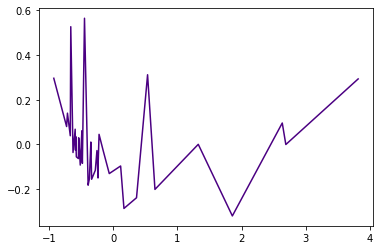

In [60]:
sns.lineplot(x=slr_model.fittedvalues,y=slr_model.resid,color='indigo')

# 10. Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [62]:
x_train,x_test,y_train,y_test=train_test_split(mdf.drop(columns='x'),mdf['x'],test_size=0.2,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

x_train=sm.add_constant(x_train)
x_test=sm.add_constant(x_test)

slr_model=sm.OLS(y_train,x_train).fit()
slr_model.summary()

(39, 2)
(10, 2)
(39,)
(10,)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      x   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     550.9
Date:                Fri, 08 Jul 2022   Prob (F-statistic):           1.01e-27
Time:                        18:57:18   Log-Likelihood:                 9.8586
No. Observations:                  39   AIC:                            -13.72
Df Residuals:                      36   BIC:                            -8.726
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0109      0.032      0.344      0.733      -0.053       0.075
Unnamed: 0    -0.0134      0.033     -0.403      0.689      -0.081       0.054
u              0.9838      0.030     33.171      0.000       0.924       1.044
==============================================================================
Omnibus:                       13.453   Durbin-Watson:                   1.654
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.176
Skew:                           1.202   Prob(JB):                     0.000835
Kurtosis:                       4.716   Cond. No.                         1.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
y_pred_train=slr_model.predict(x_train)
y_pred_test=slr_model.predict(x_test)
mse1=mean_squared_error(y_train,y_pred_train)
mse2=mean_squared_error(y_test,y_pred_test)
print('Rmse_train :',np.sqrt(mse1))
print('Rmse_test :',np.sqrt(mse2))

print('Rsquared :',slr_model.rsquared)

Rmse_train : 0.18792314466148258
Rmse_test : 0.1854213078957624
Rsquared : 0.9683602390267507


# 11. Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [67]:
x_train,x_test,y_train,y_test=train_test_split(mdf.drop(columns='x'),mdf['x'],test_size=0.2,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(39, 2)
(10, 2)
(39,)
(10,)


In [66]:
Linereg=LinearRegression()

In [69]:
Linereg.fit(x_train,y_train)

LinearRegression()

In [73]:
print('Linear Regression score :',Linereg.score(x_train,y_train))

Linear Regression score : 0.9683602390267507
